In [24]:
import pandas as pd
import s3fs
import os
import geopandas as gpd
import plotly.express as px

In [12]:
fs = s3fs.S3FileSystem(
    client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'}
)
bucket = 'projet-hackathon-un-2022'


In [16]:
path = "AIS/full_traces_destination_countries_by_mmsi_19_22.csv"
df_country = pd.read_csv(fs.open(f'{bucket}/{path}',mode='rb'),sep=";")

df_country

,mmsi,matched_destination_country,matched_destination_port,ratio1,raw_port_destination,year
0,207007000,Bulgaria,VARNA,100.000000,VARNA,2019
1,207008000,Georgia,POTI,100.000000,POTI,2019
2,207037000,Bulgaria,VARNA,100.000000,VARNA,2019
3,207038000,Denmark,ODENSE,83.333333,OPENSEA,2019
4,207124000,Spain,MARIN,88.888889,MARIUPOL,2019
...,...,...,...,...,...,...
1871,677072400,Canada,PORT ALICE,83.333333,TR ALI,2022
1872,677075600,Ukraine,KHERSON,100.000000,KHERSON,2022
1873,677080700,Canada,PORT ALICE,83.333333,TR ALI,2022
1874,677085700,Mozambique,BEIRA,88.888889,BEIRUT,2022


In [85]:
world_geo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_geo.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [90]:
def prepare_ship_count_by_country_gdf(df_ship_country,df_geo,year:int):
    df_country=df_ship_country.loc[df_ship_country["year"]==year,:]
    ship_count_by_country=df_country.groupby(['matched_destination_country']).count().reset_index().loc[:,["matched_destination_country","mmsi"]].rename({'mmsi': 'count'}, axis=1)
    return df_geo.merge(ship_count_by_country, left_on="name",right_on="matched_destination_country").set_index("name")

In [91]:
geo_df_2019 = prepare_ship_count_by_country_gdf(df_country,world_geo,2019)
geo_df_2019.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,matched_destination_country,count
name,,,,,,,
Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,11
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,24
Papua New Guinea,8776109.0,Oceania,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,18
Indonesia,270625568.0,Asia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,23


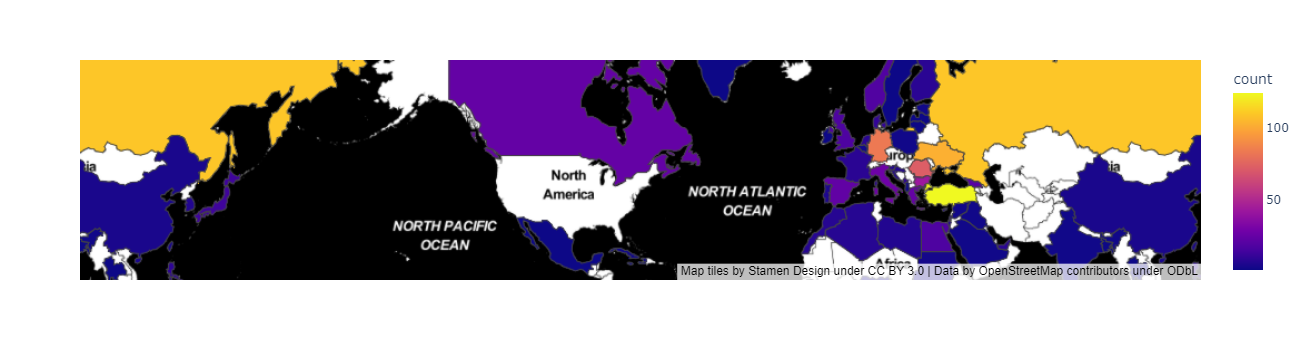

In [92]:
fig1 = px.choropleth_mapbox(geo_df_2019,
                           geojson=geo_df_2019.geometry,
                           locations=geo_df_2019.index,
                           color="count",
                           center={"lat": 45.5517, "lon": -73.7073},
                            mapbox_style="stamen-toner",
                           zoom=1)
fig1.show()

In [96]:
geo_df_2022 = prepare_ship_count_by_country_gdf(df_country,world_geo,2022)
geo_df_2022.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,matched_destination_country,count
name,,,,,,,
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,28
Papua New Guinea,8776109.0,Oceania,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,3
Indonesia,270625568.0,Asia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,24
Russia,144373535.0,Europe,RUS,1699876,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",Russia,73


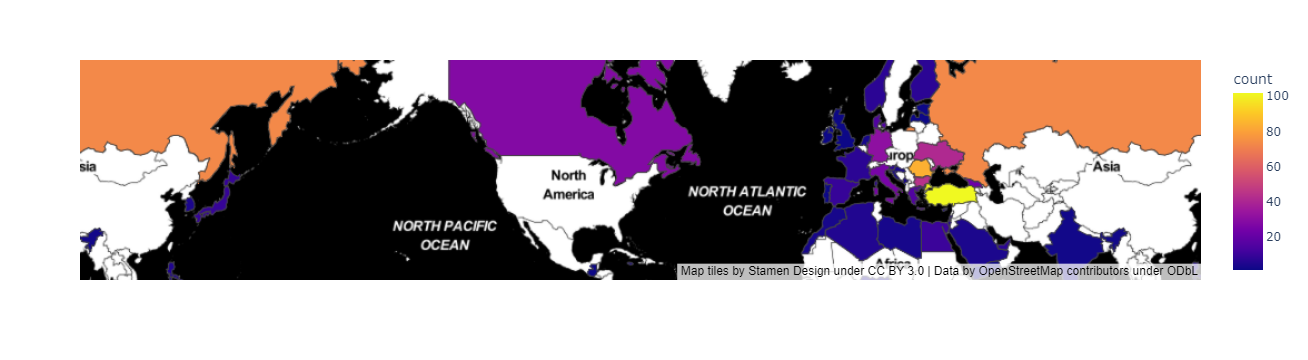

In [97]:
fig2 = px.choropleth_mapbox(geo_df_2022,
                           geojson=geo_df_2022.geometry,
                           locations=geo_df_2022.index,
                           color="count",
                           center={"lat": 45.5517, "lon": -73.7073},
                            mapbox_style="stamen-toner",
                           zoom=1)
fig2.show()